# Thyroid patients project

# Objective
## To build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

In [374]:
# importing Libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [375]:
# loading the dataset
df=pd.read_csv('/home/francis/Downloads/hypothyroid.csv')
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [376]:
#checking the shape
print('The data has',df.shape[0],'rows and',df.shape[1],'columns.')

The data has 3163 rows and 26 columns.


# Exploratory Analysis

In [377]:
# describing the data
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,...,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,...,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,...,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,...,2468,695,2914,249,2915,248,2916,247,2903,2903


In [378]:
df.mean()

Series([], dtype: float64)

In [379]:
# checking for null value
df.isnull().sum()
# there are no null values in the dataset

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [380]:
# checking for special characters 
special=df=='?'
special.sum()


status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

## Since we can not assume the genders, we'll drop the rows that have not been assinged gender. they are 73 that will be removed.

## In the case of age, we will replace the special characters with the average age of our column.
## For the other measured columns, we'll replace the special charater with a zero.

In [381]:
#dropping characters in the sex column
print(df.drop(df[df.sex.str.contains(r'[?]')].index,inplace=True))


None


In [382]:
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,...,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090
unique,2,93,2,2,2,2,2,2,2,2,...,2,69,2,263,2,150,2,255,2,53
top,negative,?,F,f,f,f,f,f,f,f,...,y,?,y,?,y,?,y,?,n,?
freq,2941,390,2182,2634,3035,3048,2988,2850,2850,3028,...,2407,683,2846,244,2847,243,2848,242,2835,2835


In [383]:
#dropping TBG column as it has very little data
df.drop('TBG',axis=1,inplace=True)

In [384]:
# replacing the special character in age column with zero, this will help us get the mean age
age=df['age']
age.replace(to_replace=['?'],value=0,inplace=True)
# changing columns to numeric
df[['age']]=df[['age']].apply(pd.to_numeric)
#getting the mean of the column
df['age'].mean()
#replacing the zeros with mean age of 51
age=df['age']
age.replace(to_replace=['0'],value=51,inplace=True)


In [385]:
# Replacing the special characters in remaing numbered columns and changing to numeric type

df.replace(to_replace=['?'],value=0,inplace=True)
#df[['TSH']]=df[['TSH']].apply(pd.to_numeric)

In [386]:
df[['TSH','T3','TT4','T4U','FTI']]=df[['TSH','T3','TT4','T4U','FTI']].apply(pd.to_numeric)

In [387]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,44.755340,5.062036,1.504466,99.864693,0.907722,102.971812
std,24.798384,22.395322,1.182024,52.270178,0.338432,51.108088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,0.500000,76.000000,0.820000,84.000000
50%,49.000000,0.400000,1.600000,100.000000,0.950000,104.000000
75%,65.000000,1.700000,2.200000,124.000000,1.050000,125.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,485.000000


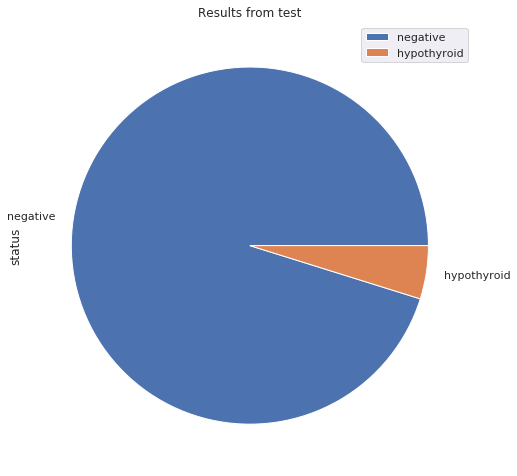

In [388]:
# plotting to see the frequency of the status
df.status.value_counts().plot(kind='pie',figsize=(8,9))
plt.title('Results from test')
plt.legend()

from the above, we can tell that only a small section of the population has hyperthyroid.

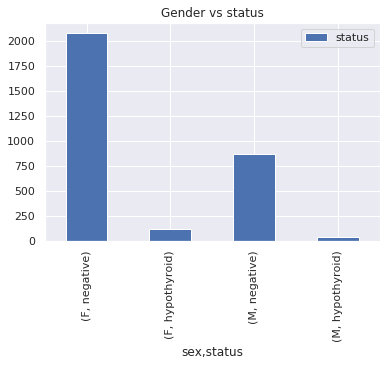

In [389]:
# plotting to see the status distribution in terms of age
coef=df.groupby(['sex'])['status'].value_counts()
coef.plot(kind='bar',title='Gender vs status')
plt.legend()

from the above we can see that more women were tested and a higher number of them were positive with hypothyroid

/home/francis/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


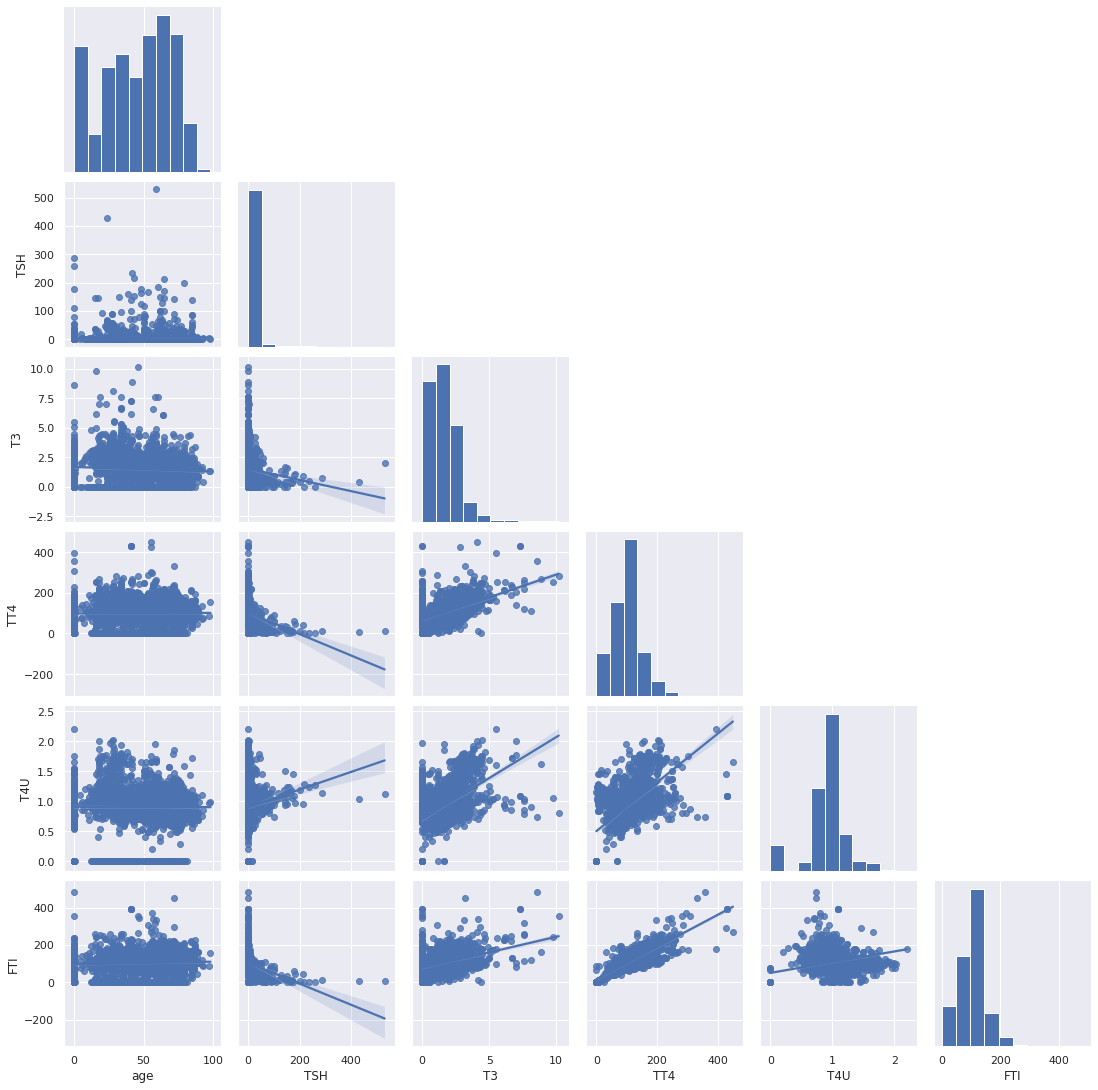

In [390]:
sns.set()
sns.pairplot(df,size = 2.5, kind = "reg",corner=True)

# Decision trees

In [391]:
#encoding the data
from sklearn.preprocessing import LabelEncoder
df_new=df.apply(LabelEncoder().fit_transform)
df_new

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,70,1,0,0,0,0,0,0,0,...,160,1,7,1,23,1,107,1,19,0
1,0,13,0,1,0,0,0,0,0,0,...,216,1,18,1,27,1,72,1,26,0
2,0,22,1,0,0,0,0,0,0,0,...,0,1,3,1,6,1,59,1,0,0
3,0,22,0,0,0,0,0,0,0,0,...,232,1,5,1,9,1,63,1,9,0
4,0,75,1,0,0,0,0,0,0,0,...,105,1,13,1,63,1,87,1,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,1,56,0,0,0,0,0,0,0,0,...,92,1,18,1,92,1,50,1,98,0
3159,1,27,0,0,0,0,0,0,0,0,...,34,1,19,1,105,1,60,1,101,0
3160,1,75,1,0,0,0,0,0,0,0,...,47,1,7,1,77,1,27,1,107,0
3161,1,72,0,0,0,0,0,0,0,0,...,48,1,2,1,71,1,8,1,140,0


In [408]:
# declaring feature and target
test_features = df.columns.to_list()
test_features.remove('status')

X=df_new.drop(['status'],axis=1)
y=df_new['status']

In [393]:
from sklearn.model_selection import train_test_split

# splitting 70% training test and 30% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)


In [394]:
# check the shape of the the train and test
X_train.shape,X_test.shape

((2163, 24), (927, 24))

In [395]:
X_train.dtypes

age                          int64
sex                          int64
on_thyroxine                 int64
query_on_thyroxine           int64
on_antithyroid_medication    int64
thyroid_surgery              int64
query_hypothyroid            int64
query_hyperthyroid           int64
pregnant                     int64
sick                         int64
tumor                        int64
lithium                      int64
goitre                       int64
TSH_measured                 int64
TSH                          int64
T3_measured                  int64
T3                           int64
TT4_measured                 int64
TT4                          int64
T4U_measured                 int64
T4U                          int64
FTI_measured                 int64
FTI                          int64
TBG_measured                 int64
dtype: object

In [396]:
X_train.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
2482,38,0,1,0,0,0,0,0,0,0,...,0,1,18,1,112,1,34,1,144,0
1974,59,0,1,0,0,0,0,0,0,0,...,0,0,0,1,189,1,52,1,197,0
361,0,0,0,0,0,1,0,0,0,0,...,0,1,6,1,88,1,44,1,100,0
2989,36,1,0,0,0,0,0,0,0,0,...,0,1,19,1,119,1,58,1,117,0
212,16,0,0,0,0,0,0,0,0,0,...,40,1,31,1,149,1,91,1,111,0


In [397]:
X_test.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
2803,63,1,0,0,0,0,0,0,0,0,...,0,1,10,1,84,1,26,1,119,0
1335,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1635,62,1,0,0,0,1,0,0,0,0,...,91,1,23,1,120,1,70,1,106,0
2683,61,1,0,1,0,0,0,0,0,0,...,0,0,0,1,58,1,44,1,65,0
2072,68,0,0,0,0,0,0,1,0,0,...,0,1,27,1,138,1,66,1,126,0


## classification tree

In [398]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier as DTC

In [399]:
# instantiating the decision tree with criterion gini index
gini=DTC(criterion='gini',max_depth=4,random_state=123)

#fitting the model
gini.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [400]:
# predicting the results 
y_pred=gini.predict(X_test)

In [401]:
# checking the score of the model
from sklearn.metrics import accuracy_score

print(' the accuracy of the model with critereon gini index:',(accuracy_score(y_test,y_pred)))

 the accuracy of the model with critereon gini index: 0.9913700107874865


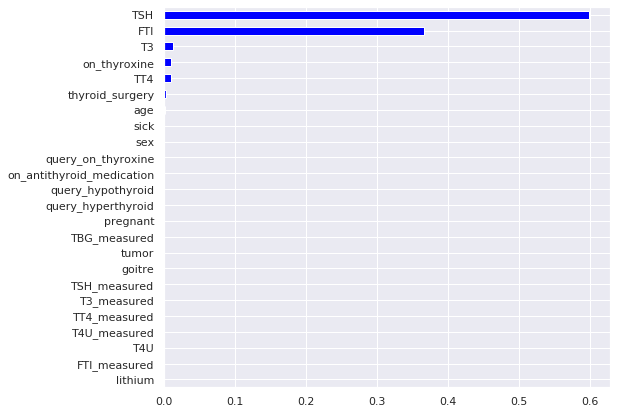

In [402]:
# plotting to see feature importance
importance_p=pd.Series(gini.feature_importances_,index=X.columns)
#sort descending
dec_importance=importance_p.sort_values()
dec_importance.plot(kind='barh', color='blue', figsize=(8,7))
plt.show()

The plot above shows us the most omportant features that were considered for the decision tree.

## Decision tree regressor

In [403]:
# importing random forest
from sklearn.ensemble import RandomForestRegressor as RFR 

forest=RFR(n_estimators=100, random_state=40,min_samples_split=20,max_depth=4)
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)

In [404]:
# predicting based on the model
y_pred2=forest.predict(X_test)

In [405]:
#checking the accuracy score
print(' the accuracy of the model:',(accuracy_score(y_test,y_pred)))

 the accuracy of the model: 0.9913700107874865


## Support vector machine

In [410]:
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC

In [439]:
# separating the test and train set
Xs=df_new.drop(['status'],axis=1)
ys=np.where(df_new['status'],0,1)

X_train,X_test,y_train,y_test=train_test_split(Xs,ys,test_size=0.2,random_state=0)
y_test.shape

(618,)

In [450]:
#the svm model
hypothyroid_model=SVC(kernel='linear')
hypothyroid_model.fit(X_train,y_train)
# predicting the results
y_pred3=hypothyroid_model.predict(X_test)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

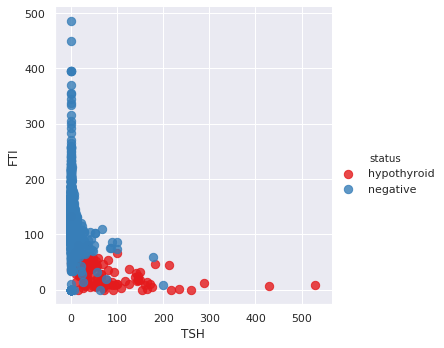

In [468]:
sns.lmplot('TSH', 'FTI', data=df, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

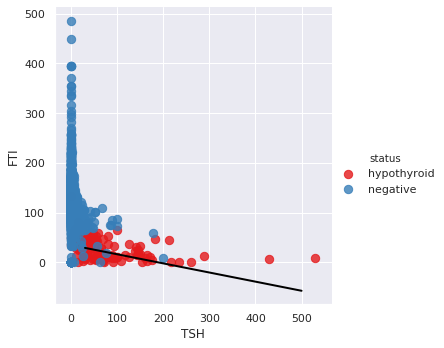

In [467]:
# Get the separating hyperplane
w = hypothyroid_model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers from the largest number of the butter vlaues and the smallest number of the butter values.  
xx = np.linspace(30, 500)
yy = a * xx - (hypothyroid_model.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot('TSH', 'FTI', data=df, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx, yy, linewidth=2, color='black');


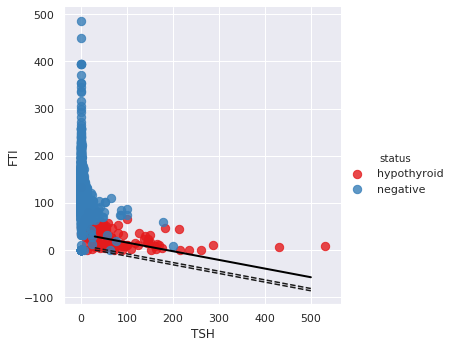

In [458]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = hypothyroid_model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = hypothyroid_model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Look at the margins and support vectors
sns.lmplot('TSH', 'FTI', data=df, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--') 
plt.plot(xx, yy_up, 'k--')
plt.scatter(hypothyroid_model.support_vectors_[:, 0], hypothyroid_model.support_vectors_[:, 1],s=80, facecolors='none');
